# Tutorial on mdPCA and maasMDS Visualization

In [1]:
import sys, os

dir = os.path.abspath('../')
if not dir in sys.path: sys.path.append(dir)

import logging
from snputils.snp.io.read.vcf import VCFReader
from snputils.ancestry.io.local.read import MSPReader
from snputils.processing.mdpca import mdPCA
from snputils.processing.maasmds import maasMDS
from snputils.processing._utils.gen_tools import logger_config
from snputils.visualization.scatter_plot import scatter

### 1. Load Input Data for mdPCA

Load data files required for running mdPCA, including SNP and LAI data, along with the labels file specifying ancestry labels.

In [2]:
# File paths for SNP data, LAI data, and sample labels
vcf_path = '../data/easComp_6_samples_chr1.vcf'
msp_path = '../data/easComp_6_samples_chr1.msp'
labels_file = '../data/easComp_6_samples_chr1_labels.tsv'

# Load SNP data from VCF file
snpobj = VCFReader(vcf_path).read(sum_strands=False)

# Load LAI data from MSP file
laiobj = MSPReader(msp_path).read()

# Configure logging to display messages in the console
logging.config.dictConfig(logger_config(verbose=True))

### 2. Run mdPCA

Initialize and run the mdPCA analysis.

In [3]:
# Initialize the mdPCA object with SNP and LAI data, labels file, and selected ancestry
mdpca = mdPCA(
    snpobj=snpobj,         # SNP data object
    laiobj=laiobj,         # LAI data object
    labels_file=labels_file, # File containing sample labels
    ancestry="4"           # Ancestry component to analyze (e.g., '4' for East Asia)
)

[INFO] 2024-11-20 08:49:32: ------ Array 1 Processing: ------
[INFO] 2024-11-20 08:49:32: VCF Processing Time: --- 0.08896374702453613 seconds ---
[INFO] 2024-11-20 08:49:32: TSV Processing Time: --- 0.07820534706115723 seconds ---
[INFO] 2024-11-20 08:49:32: Masking for ancestry 0 --- 0.0006721019744873047 seconds ---
[INFO] 2024-11-20 08:49:32: Masking for ancestry 1 --- 0.0010004043579101562 seconds ---
[INFO] 2024-11-20 08:49:32: Masking for ancestry 2 --- 0.0010309219360351562 seconds ---
[INFO] 2024-11-20 08:49:32: Masking for ancestry 3 --- 0.0024771690368652344 seconds ---
[INFO] 2024-11-20 08:49:32: Masking for ancestry 4 --- 0.0014414787292480469 seconds ---
[INFO] 2024-11-20 08:49:32: Covariance Matrix --- 0.12268495559692383 seconds ---
[INFO] 2024-11-20 08:49:32: Percent variance explained by the principal component 1: 40.66990976545803
[INFO] 2024-11-20 08:49:32: Percent variance explained by the principal component 2: 35.323312747684334


In [4]:
print("X_new", mdpca.X_new_)

X_new [[ 0.05753786 -0.07705574]
 [ 0.31123924  0.07635565]
 [-0.14243854 -0.03442202]
 [-0.07117519 -0.22365777]
 [-0.15516337  0.25877988]]


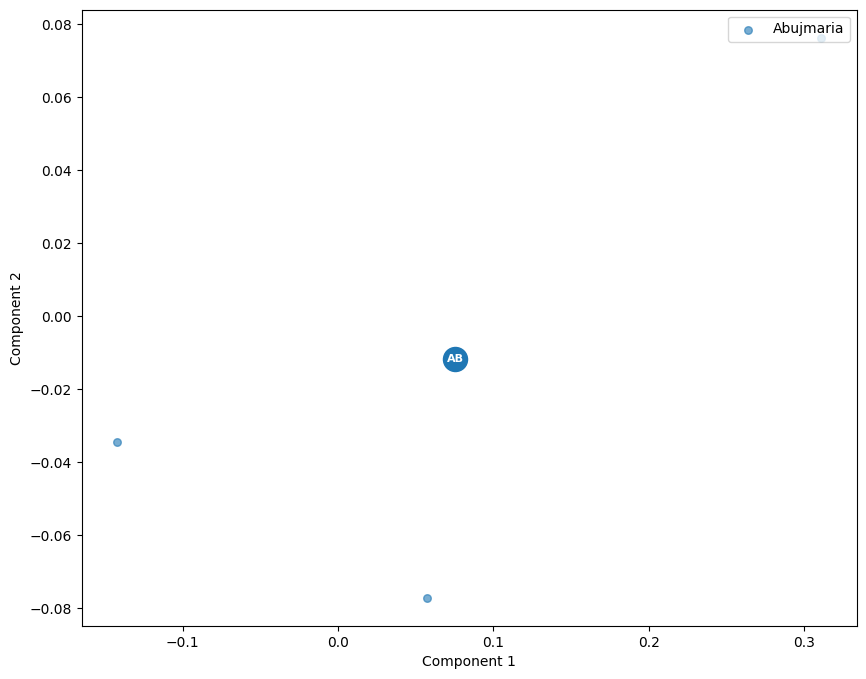

In [5]:
scatter(mdpca, labels_file)

### 3. Run maasMDS

Initialize and run the maasMDS analysis.

In [6]:
# Configure logging to display messages in the console
logging.config.dictConfig(logger_config(verbose=True))

# Initialize the maasMDS object with SNP and LAI data, labels file, and selected ancestry
mds = maasMDS(
    snpobj=snpobj,         # SNP data object
    laiobj=laiobj,         # LAI data object
    labels_file=labels_file, # File containing sample labels
    ancestry="4"           # Ancestry component to analyze (e.g., '4' for East Asia)
)

[INFO] 2024-11-20 08:49:32: ------ Array 1 Processing: ------
[INFO] 2024-11-20 08:49:32: VCF Processing Time: --- 0.0840766429901123 seconds ---
[INFO] 2024-11-20 08:49:32: TSV Processing Time: --- 0.07722902297973633 seconds ---
[INFO] 2024-11-20 08:49:32: Masking for ancestry 0 --- 0.0006477832794189453 seconds ---
[INFO] 2024-11-20 08:49:32: Masking for ancestry 1 --- 0.0006830692291259766 seconds ---
[INFO] 2024-11-20 08:49:32: Masking for ancestry 2 --- 0.0007250308990478516 seconds ---
[INFO] 2024-11-20 08:49:32: Masking for ancestry 3 --- 0.002404451370239258 seconds ---
[INFO] 2024-11-20 08:49:32: Masking for ancestry 4 --- 0.001440286636352539 seconds ---
[INFO] 2024-11-20 08:49:32: Distance Matrix building: --- 0.004311800003051758 seconds ---


In [7]:
print("X_new", mdpca.X_new_)

X_new [[ 0.05753786 -0.07705574]
 [ 0.31123924  0.07635565]
 [-0.14243854 -0.03442202]
 [-0.07117519 -0.22365777]
 [-0.15516337  0.25877988]]


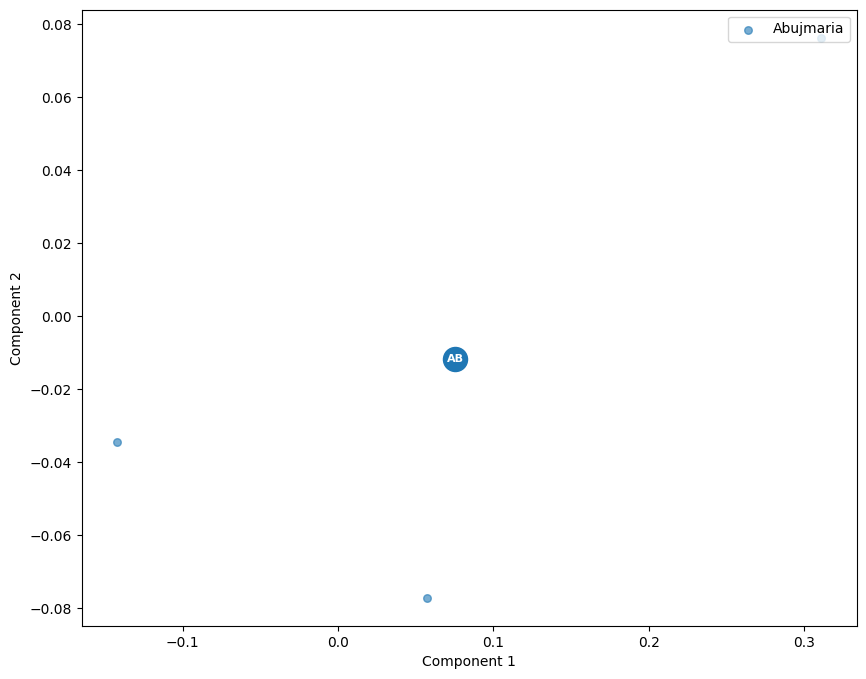

In [8]:
scatter(mdpca, labels_file)